# 说明
- 第一张图包含等间距插值和用切比雪夫节点插值的结果，第二张图是使用Cubicspline插值的结果
- 切比雪夫插值的误差很明显，最后附上一张误差图

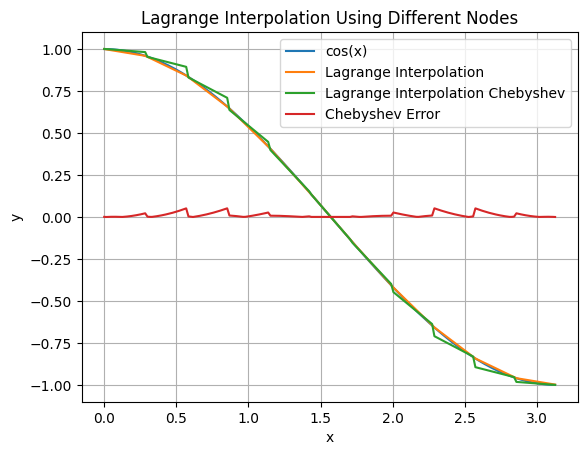

<Figure size 640x480 with 0 Axes>

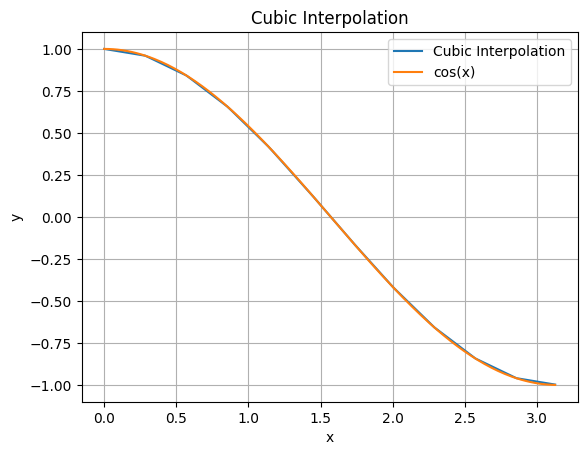

In [19]:
from math import cos, pi
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt

point = np.linspace(0, pi, 12)
chebypoint = 0.5 * (1 - np.cos((2 * np.arange(12) + 1) * pi / (2 * 12))) * pi
oriresult = []
lagresult = []
lagresult_cheby = []
cubiresult = []
chebyerror = []
x = np.linspace(0, pi, 200)

def lagrange_interpolation(x_nodes, y_nodes, x_eval):
    f = interpolate.lagrange(x_nodes, y_nodes)
    return f(x_eval)

def cubic_interpolation(x_nodes, y_nodes, x_eval):
    f = interpolate.CubicSpline(x_nodes, y_nodes)
    return f(x_eval)
x_index = 0
for loop in range(11):
    while x_index < len(x) and x[x_index] < point[loop + 1]:
        oriresult.append(cos(x[x_index]))
        lagresult.append(lagrange_interpolation(point[loop:loop + 2], [cos(point[loop]), cos(point[loop + 1])], x[x_index]))
        cubiresult.append(cubic_interpolation(point[loop:loop + 2], [cos(point[loop]), cos(point[loop + 1])], x[x_index]))
        lagresult_cheby.append(lagrange_interpolation(chebypoint[loop:loop + 2], [cos(chebypoint[loop]), cos(chebypoint[loop + 1])], x[x_index]))
        x_index += 1
for i in range(0, 199):
    chebyerror.append(abs(oriresult[i] - lagresult_cheby[i]))
plt.plot(x[:len(oriresult)], oriresult, label='cos(x)')
plt.plot(x[:len(lagresult)], lagresult, label='Lagrange Interpolation')
plt.plot(x[:len(lagresult_cheby)], lagresult_cheby, label='Lagrange Interpolation Chebyshev')
plt.plot(x[:len(cubiresult)], chebyerror, label='Chebyshev Error')
plt.legend()
plt.title('Lagrange Interpolation Using Different Nodes')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()
plt.savefig('lagrange_interpolation.png', dpi=600, bbox_inches='tight')
plt.figure()
plt.plot(x[:len(oriresult)], cubiresult, label='Cubic Interpolation')
plt.plot(x[:len(oriresult)], oriresult, label='cos(x)')
plt.legend()
plt.title('Cubic Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

